<h1 style= "color:#9370DB;"> Test </h1>

In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# New liabraries. 
import scipy.stats as st

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g



/opt/anaconda3/envs/streamlit-stock/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2 style="color: #4C9F70;"> 01 | Data Extraction </h2>

In [2]:
data = pd.read_csv('sp500_stocks.csv')
sp = pd.read_csv('sp500_index.csv')
annual_returns = pd.read_csv('annual_returns.csv')

In [3]:
# Cleaning columns with snake_case 
data.columns = [col.lower().replace(" ", "_")for col in data.columns] 
sp.columns = [col.lower().replace(" ", "_")for col in sp.columns] 

<h3 style="color: #4682B4;">1.1 | Exploring the Data </h3>

In [ ]:
data.sample(3)

In [ ]:
df.sample(3)

In [ ]:
sp.sample(3)

<h3 style="color: #4682B4;">1.2 | Copies</h3>

In [4]:
data2 = data.copy()
df2 = df.copy()
sp2 = sp.copy()

NameError: name 'df' is not defined

<h2 style="color: #4C9F70;"> 02 | Data Cleaning </h2>

<h3 style="color: #4682B4;"> 2.1 | Dealing with Data types</h3>

In [ ]:
sp.dtypes

<h3 style="color: #4682B4;"> 2.2 | Dealing with NaN values</h3>

In [ ]:
df.isna().sum()

In [ ]:
sp.isna().sum()

In [ ]:
data.isna().sum()

In [ ]:
# Delete NaN.
data2.dropna(how='any', inplace=True)

In [ ]:
data2.isna().sum()

In [ ]:
# Use this as a reference conunting the same after dropping them that without droping them. 
data2.symbol.value_counts()

<h3 style="color: #4682B4;"> 2.3 | Dealing with Duplicates</h3>

In [ ]:
data2.duplicated().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
sp.duplicated().sum()

<h3 style="color: #4682B4;"> 2.4 | Dealing with columns </h3

In [ ]:
data2

In [ ]:
# Delete Columns 
data2.drop(columns=['high', 'low', 'open','close','volume'], inplace=True)

In [ ]:
data2.rename(columns={'adj_close': 'price'}, inplace=True)


In [ ]:
#Create new symbol. 
sp['symbol'] = 'SP500'


In [ ]:
data2

In [ ]:
sp

In [ ]:
sp.rename(columns={'s&p500': 'price'}, inplace=True)
cols = ['date', 'symbol', 'price']
sp[cols] = sp[cols]
sp.head()


In [ ]:
cols = ['date', 'symbol', 'price']
sp = sp[cols]
sp.head()

In [ ]:
sp.columns = ['date', 'symbol', 'price']

In [ ]:
stock_df = pd.concat([data2, sp], axis=0, ignore_index=True)

In [ ]:
stock_df

In [ ]:
# Change to datetime from stocks. 
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [ ]:
stock_df['year'] = stock_df['date'].dt.year
stock_df['month'] = stock_df['date'].dt.month
stock_df['day'] = stock_df['date'].dt.day

In [ ]:
# Creating new columns. Which will give us the annual return yearly per each stock & sp500. 
annual_returns = stock_df.groupby(['symbol', 'year']).apply(lambda group: (group['price'].iloc[-1] / group['price'].iloc[0]) - 1).reset_index(name='annual_return').round(4)

In [ ]:
annual_returns

In [ ]:
annual_returns[annual_returns['symbol'] == "SP500"]

In [ ]:
annual_returns.to_csv('annual_returns.csv')

In [6]:
def annual_return_plot(annual_returns, stock):
    # Filter the DataFrame for the selected symbol (stock)
    symbol_data = annual_returns[annual_returns["symbol"].isin([stock, 'SP500'])]

    # If no data is found for the selected stock, print a warning and exit the function
    if symbol_data.empty:
        print(f"⚠️ No data available for this company: '{stock}'")
        return

    # Pivot the DataFrame to structure it for plotting: 
    # Index will be the 'year', columns will be the 'symbol', and values will be the 'annual_return'
    df_pivot = symbol_data.pivot(index="year", columns="symbol", values="annual_return")

    # Define custom colors for the plot
    colors = {'SP500': '#FF0000', stock: '#0000FF'}

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the annual return data for the selected symbol over the years
   for i, symbol in enumerate(df_pivot.columns):
        plt.plot(df_pivot.index, df_pivot[symbol], marker='o', label=symbol, color=colors[symbol])

    # Title and labels for the plot
    plt.title(f"Annual Return Comparison: {stock} vs SP500", fontsize=14, fontweight='bold', color="#800080")
    plt.xlabel("Year", fontsize=12, fontweight='bold', color="#C71585")
    plt.ylabel("Annual Return (%)", fontsize=12, fontweight='bold', color="#C71585")
    plt.legend(title="Symbol", title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()


IndentationError: unindent does not match any outer indentation level (<string>, line 21)

In [ ]:
annual_return_plot(annual_returns, 'AAPL')

In [ ]:
def annual_return_plot (annual_returns, stock):

    # Filter the DataFrame for the selected question
    symbol = annual_returns[annual_returns["symbol"] == stock]

    # If no data is found, print a warning
    if trend_df.empty:
        print(f"⚠️ No data available for question: '{question}'")
        return

    # Pivot the DataFrame to structure it for plotting
    df_pivot = trend_df.pivot(index="year", columns="answer", values="percentage")

    # Define custom colors in shades of pink and purple
    colors = ["#FF69B4", "#FF1493", "#C71585", "#800080", "#8A2BE2"]

    # Create the plot with custom colors
    plt.figure(figsize=(12, 6))

    # Plot each age group with the defined colors
    for i, answer in enumerate(df_pivot.columns):
        plt.plot(df_pivot.index, df_pivot[answer], marker='o', label=answer, color=colors[i % len(colors)])

    # Title and labels
    plt.title(f"{question} Distribution Over the Years", fontsize=14, fontweight='bold', color="#800080")
    plt.xlabel("Year", fontsize=12, fontweight='bold', color="#C71585")
    plt.ylabel("Percentage", fontsize=12, fontweight='bold', color="#C71585")
    plt.legend(title="Answer Groups", title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()

In [ ]:
#DOUBLE CHECK HOW WE WILL NEED IT 

# Change to datetime from stocks. 
#data2['date'] = pd.to_datetime(data2['date'])
# Change to datetime. SP 500. 
#sp['date'] = pd.to_datetime(sp['date'])

#data2['year'] = data2['date'].dt.year
#data2['month'] = data2['date'].dt.month
#data2['day'] = data2['date'].dt.day
#sp['year'] = sp['date'].dt.year
#sp['month'] = sp['date'].dt.month
#sp['day'] = sp['date'].dt.day

In [7]:
import matplotlib.pyplot as plt

def annual_return_plot(annual_returns, stock='SP500'):
    # Filter the DataFrame for both the selected symbol (stock) and SP500
    symbols_to_plot = annual_returns[annual_returns["symbol"].isin([stock, 'SP500'])]
    
    # If no data is found for the selected stock or SP500, print a warning and exit the function
    if symbols_to_plot.empty:
        print(f"⚠️ No data available for {stock} or SP500.")
        return
    
    # Pivot the DataFrame to structure it for plotting: 
    # Index will be the 'year', columns will be the 'symbol', and values will be the 'annual_return'
    df_pivot = symbols_to_plot.pivot(index="year", columns="symbol", values="annual_return")
    
    # Define custom colors: SP500 will always be red, and the selected stock will be blue
    colors = {'SP500': '#FF0000', stock: '#0000FF'}

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the annual return data for the selected symbol and SP500 over the years
    for i, symbol in enumerate(df_pivot.columns):
        plt.plot(df_pivot.index, df_pivot[symbol], marker='o', label=symbol, color=colors[symbol])

    # Title and labels for the plot
    plt.title(f"Annual Return Comparison: {stock} vs SP500", fontsize=14, fontweight='bold', color="#5F9EA0")
    plt.xlabel("Year", fontsize=12, fontweight='bold', color="#1E90FF")
    plt.ylabel("Annual Return (%)", fontsize=12, fontweight='bold', color="#4682B4")
    plt.legend(title="Symbol", title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()


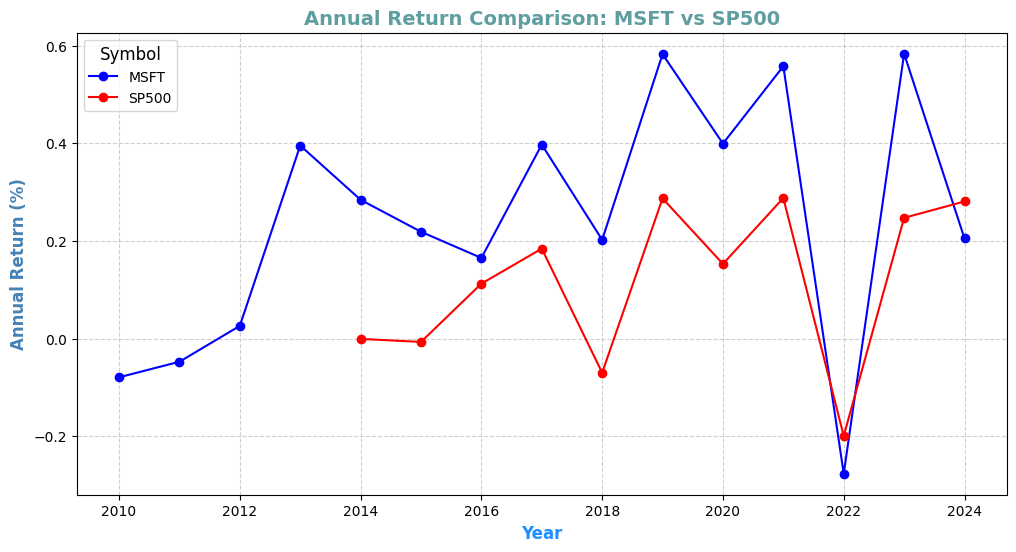

In [8]:
annual_return_plot(annual_returns, 'MSFT')

In [ ]:
# Drop rows where year is between 2010 and 2013 because SP500 for comparison we do have 2014. 
#data2.drop(data2[(data2['year'] >= 2010) & (data2['year'] <= 2014)].index, inplace=True)
# Drop row for sp 500 as we do not have many. 
# sp.drop(sp[sp['year'] == 2014].index, inplace=True)

In [ ]:
# Creating new columns. Which will give us the annual return yearly per each stock & sp500. 
annual_returns = data2.groupby(['symbol', 'year']).apply(lambda group: (group['adj_close'].iloc[-1] / group['adj_close'].iloc[0]) - 1).reset_index(name='annual_return').round(4)
annual_returns_sp = sp.groupby('year').apply(lambda group: (group['s&p500'].iloc[-1] / group['s&p500'].iloc[0]) - 1).reset_index(name='annual_return').round(4)
annual_returns_sp['symbol'] = 'SP500'

In [ ]:
cols = ['symbol', 'year', 'annual_return']
annual_returns_sp = annual_returns_sp[cols]

In [ ]:
pivoted_df = annual_returns.pivot(index='symbol', columns='year', values='annual_return')
pivoted_sp = annual_returns_sp.pivot(index='symbol',columns='year', values='annual_return')

In [ ]:
# Unification from annual return from each stock adding the sp500. 
defi = pd.concat([pivoted_df,pivoted_sp], axis=0)
definitive = pd.merge (df2, pivoted_df, on='symbol')

In [ ]:
definitive = definitive.rename(columns={2015: 'ar_2015',2016:'ar_2016',2017: 'ar_2017', 
                                          2018:'ar_2018', 2019: 'ar_2019',2020: 'ar_2020', 2021: 'ar_2021', 2022:'ar_2022', 2023:'ar_2023',2024: 'ar_2024'})

<h3 style="color: #4682B4;"> 2.5 | Moving target to the right </h3>

In [ ]:
#Dropping Columns: Exchange, longname, longbusinesssumary. 
cols = ['symbol', 'shortname','sector','industry',
        'marketcap','ebitda', 'revenuegrowth', 'city', 'state', 'country',   
        'fulltimeemployees', 'weight', 'ar_2015', 'ar_2016', 'ar_2017', 'ar_2018', 'ar_2019',
        'ar_2020', 'ar_2021', 'ar_2022', 'ar_2023', 'ar_2024', 'currentprice']

In [ ]:
definitive = definitive[cols]

In [ ]:
definitive.head(4)

# <h2 style="color: #4C9F70;"> 03 | EDA (Exploratory Data Analysis) </h2>

<h3 style="color: #4682B4;">3.1 | Descriptive Statistics </h3>

In [ ]:
# Selecting categorical columns. 
cat = definitive.select_dtypes(exclude='number')
cat.head(5)

In [ ]:
# Selecting numerical columns. 
num = definitive.select_dtypes(include='number')
num.head(5)

In [ ]:
definitive.describe()

In [ ]:
definitive['currentprice'].describe()

<h3 style="color: #4682B4;"> 3.2 | Univariate & Bivariate Analysis </h3>

<h4 style="color: #D2691E;"> 3.2.1 | Categorical Variables </h4>

In [ ]:
frequency_table = cat.sector.value_counts()
proportion_table = cat.sector.value_counts(normalize=True)

In [ ]:
frequency_proportion = pd.concat([frequency_table,proportion_table], axis = 1)
frequency_proportion.columns = ['absolute_frequency', 'relative_frequency']

In [ ]:
total_absolute = frequency_table.sum()
total_relative = proportion_table.sum()


In [ ]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])

In [ ]:
df3 = pd.concat([frequency_proportion, total_row])
df3

In [ ]:
sns.barplot(
    x='sector',
    y='absolute_frequency',
    data=frequency_proportion,
    palette='viridis',
)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The frequency table gives the count of each sector, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories. Such as:
- Technology: 16% 
- Industrials: 14% 
- Financial Services: 13% 
- Healthcare: 12% 
- Consumer Cyclical: 10% 

<h4 style="color: #D2691E;"> 3.2.2 | Numerical Variables </h4>

In [ ]:
definitive['currentprice'].describe()

**Insights** from Summary Statistics for `currentprice`:

- The average (**mean**) sale price of the stock in the dataset is approximately **$230.29**. This represents the central tendency of the prices.

- The **median** sale price is **$126.82**. Notably, the median is significantly lower than the mean, suggesting that the distribution of stock prices is skewed towards higher values (positively-skewed).

- The **standard deviation**, which measures the variation or spread of prices, is **$521.99**. This large value indicates a high level of variability in stock prices, suggesting that prices are widely dispersed from the mean.

- The **minimum** and **maximum** prices are **$8.56** and **$8946.33**, respectively. This extreme range highlights that the dataset includes stocks with both very low and very high prices.

- The **interquartile range (IQR)**, representing the middle 50% of the prices, lies between $71.54 (Q1) and $239.19 (Q3). This means that 50% of the stock prices fall within this range, providing a clearer picture of the typical stock price distribution without being influenced by outliers.

**Additional Note:**
The significant difference between the mean and median, combined with the large standard deviation, suggests the presence of outliers or high-value stocks that push the mean upwards. This highlights the importance of focusing on the IQR for understanding the core stock price range.

In [ ]:
definitive.currentprice.skew().round(2)

In [ ]:

definitive.currentprice.kurtosis().round(2)

In [ ]:
d2 = sns.displot(data=definitive, x='currentprice', kde=True, height=6, aspect=1.5, bins=100, binrange=(0, 2100), color='mediumpurple')
d2.set(xlabel='Current Price')
plt.xlim(0, 2100)

- Skewness of `currentprice`: \(11.81\)
- Kurtosis of `currentprice`: \(174.88\)

**Insights**:

1. **Skewness**: The positive value of skewness 11.81 for the 'currentprice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of stocks that have higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 174.88 indicates that the 'currentprice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'currentprice' than one would expect in a normally distributed set.

In [ ]:
sns.boxplot(data=num.currentprice)
plt.show()

In [ ]:
higher_price = definitive.sort_values(by='currentprice', ascending=False)
higher_price.head(4)

The box plot for 'currentprice' reveals 4 outstanding outliers that significantly exceed the upper range of typical values. These outliers are stock prices that are far above the third quartile (Q3), suggesting that while most prices fall within a relatively normal range, there are a few extreme high-value stocks.

Outliers are detected as values that lie beyond 1.5 times the interquartile range (IQR) above Q3. These extreme values can impact the overall analysis, particularly the mean and standard deviation, causing them to shift upwards.

- NVR, Inc: $8946.33

- Booking Holdings Inc.: $5300.34

- AutoZone Inc. :$3309.44

- Fair Isaac Corporation: $2371.83 


<h4 style="color: #D2691E;"> 3.2.3 | Numerical vs Categorical Variables </h4>

In [ ]:
# Found out in Kaggle related notebooks. 
f = {'revenuegrowth':['mean'], 'marketcap':['sum'], 'shortname':['count']}

sector_breakdown = definitive.groupby('sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('shortname', ascending=False)

fig = plt.figure(num=None, figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="shortname", y="sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="marketcap", y="sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="revenuegrowth", y="sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

In [ ]:
#Help from thisp part to display the market cap. 
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
market_bysector = definitive.groupby("sector")[["marketcap", "revenuegrowth"]].mean()
market_bysector.reset_index()

In [ ]:
sns.violinplot(data=definitive, x='sector', y='revenuegrowth', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
annual_returns = definitive.groupby('sector')[['ar_2015', 'ar_2016', 'ar_2017','ar_2018', 'ar_2019', 'ar_2020','ar_2021','ar_2022','ar_2023','ar_2024' ]].agg(['mean']).round(4)
annual_returns

In [ ]:
plt.figure(figsize=(9, 7)) 
sns.heatmap(annual_returns, annot=True, cmap="BuPu", fmt=".3f")
plt.show()

<h4 style="color: #D2691E;"> 3.2.4 | Continuous vs Continuous Variables </h4>

In [ ]:
sorted_df = defi.sort_values(by=2024, ascending=False)
sorted_df = sorted_df.reset_index()
sorted_df.columns.name = None
sorted_df.head(3)

In [ ]:
# Sampling with. 
sample_symbols = ['AMZN','PEP','NKE','SP500']
sample_df = sorted_df[sorted_df['symbol'].isin(sample_symbols)]
# Sampling with. 
sample_symbols1 = ['MSFT','PEP','NKE','SP500','JPM','XOM']
sample_df1 = sorted_df[sorted_df['symbol'].isin(sample_symbols1)]
# Sampling with. 
sample_symbols2 = ['AAPL','MA','WBA','MAR','PEP','SP500','JPM']
sample_df2 = sorted_df[sorted_df['symbol'].isin(sample_symbols2)]

In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return across different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df1.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df2.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()

<h3 style="color: #4682B4;"> 3.3 | Checking Distributions</h3>

In [ ]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #4682B4;"> 3.4 | Checking our target distribution</h3>

In [ ]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(definitive["currentprice"], color=color, kde=True);

<h3 style="color: #4682B4;">3.5 | Looking for Correlations </h3>

In [ ]:
# Calculating the Pearson correlation coefficient between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'])

In [ ]:
# Calculating the Spearman rank correlation between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'], method='spearman')

- Pearson Correlation: \(0.0423\)
- Spearman Correlation: \(0.2741\)

**Insights:**

- The **Pearson correlation** of \(0.0423\) suggests a very weak positive linear relationship between currentprice and revenuegrowth. As revenuegrowth increases, currentprice does not show a strong linear increase.
  
- The **Spearman correlation** of \(0.2741\) indicates a weak positive monotonic relationship. This suggests that while higher revenuegrowth tends to correspond with higher currentprice, the relationship is not strongly linear or constant. 

The slightly higher value for Spearman correlation suggests that there might be some non-linear aspects to their relationship or the presence of outliers affecting the Pearson correlation.

In [ ]:
#pearson 
num.corrwith(definitive['currentprice']).sort_values(ascending=False)

In [ ]:
#Spearman
num.corrwith(df['currentprice'], method='spearman').sort_values(ascending=False)[:5]

Variables like `ar_2023`, `marketcap`, `weight`, and `ar_2020` have moderate positive correlations with `currentprice`, suggesting that as these variables increase, the currentprice tends to increase as well, but the relationship is not strong.

In [ ]:
num_corr = num.corr()
num_corr

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

<h3 style="color: #4682B4;">3.6 | Hypothesis Testing </h3>

<h4 style="color: #D2691E;"> 3.6.1 | Hypothesis 1 </h4>

We will use **one-way ANOVA** to determine if there is a statistically significant difference in **revenue growth** based on the **sector**.

#### Define Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in the mean **revenue growth** between these five different sectors:
    - **Technology**
    - **Industrials**
    - **Finance Services** 
    - **Healthcare**
    - **Consumer Cyclical**
- **Alternative Hypothesis (H₁)**: There is a significant difference between these different sectors in the mean **revenue growth**. 

In [ ]:
# Extract revenuegrowth by sector.
tech_df = definitive[definitive['sector'] == 'Technology']['revenuegrowth']
indus_df = definitive[definitive['sector'] == 'Industrials']['revenuegrowth']
fin_df = definitive[definitive['sector'] == 'Financial Services']['revenuegrowth']
health_df = definitive[definitive['sector'] == 'Healthcare']['revenuegrowth']
consumer_df = definitive[definitive['sector'] == 'Consumer Cyclical']['revenuegrowth']

In [ ]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df, indus_df, fin_df, health_df, consumer_df)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: revenuegrowth has no significant difference between sectors.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in revenuegrowth between the sectors.")

**Observations** 

The ANOVA test results indicate that while the mean revenue growth differs across sectors these differences are not statistically significant at the alpha. 

<h4 style="color: #D2691E;"> 3.6.2 | Hypothesis 2 </h4>

**Has price a significant difference depending on the sector?**

- Null Hypothesis (H₀): There is **no** significant difference in the mean **price** between different sectors.
- Alternative Hypothesis (H₁): There is significant difference in the mean **price** between different sectors.

In [ ]:
# Extract currentprice by sector.
tech_df2 = definitive[definitive['sector'] == 'Technology']['currentprice']
indus_df2 = definitive[definitive['sector'] == 'Industrials']['currentprice']
fin_df2 = definitive[definitive['sector'] == 'Financial Services']['currentprice']
health_df2 = definitive[definitive['sector'] == 'Healthcare']['currentprice']
consumer_df2 = definitive[definitive['sector'] == 'Consumer Cyclical']['currentprice']

In [ ]:
print(tech_df2.mean())
print(indus_df2.mean())
print(fin_df2.mean())
print(health_df2.mean())
print(consumer_df2.mean())

In [ ]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df2, indus_df2, fin_df2, health_df2, consumer_df2)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Price has no significant difference between sectors.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in price between the sectors.")

**Observations** 

The ANOVA test indicates that while the mean current prices differ across the five sectors these differences are not statistically significant. The data doesn't provide strong enough evidence to suggest that sector has a meaningful effect on the differences in current prices. 

In [ ]:
definitive

In [ ]:
yahoo_df = pd.read_csv("yahoo_api.csv")

In [ ]:
yahoo_df

In [ ]:
df1 = pd.merge(definitive, yahoo_df, on='symbol')

In [ ]:
# If I run inner join we do have left 178 stocks. 
df1

In [ ]:
df2 = pd.merge(definitive, yahoo_df, on='symbol', how='outer')

In [ ]:
# If I do have outer join I do have left 825 stocks. 
df2

In [ ]:
df2.sample(10)

In [ ]:
# Selecting categorical columns. 
cat1 = df2.select_dtypes(exclude='number')
cat1.head(5)

In [ ]:
# Selecting categorical columns. 
num1 = df2.select_dtypes(include='number')
num1.head(5)

In [ ]:
num_corr2 = num1.corr()
num_corr2

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr2)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr2, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df2

In [ ]:
df2.isna().sum()